In [1]:
#Librerias
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
#Importar datos
df = pd.read_excel("datos_producción.xlsx")
df.head(2)

,Semana,Horas_Trabajadas,Horas_Descanso,Productos_Terminados
0,1,42,2,28.925481
1,2,45,3,30.570058


In [3]:
#Seleccionar variables
x1 = "Horas_Trabajadas"
x2 = "Horas_Descanso"
y = "Productos_Terminados"

Coeficientes:  [ 0.50221005 -0.63991539]
Intercepción:  6.456509255157648
Ecuación del plano: y = 0.502 * Horas Trabajadas + -0.64 * Horas de Descanso + 6.457
Coeficiente de determinación:  0.797


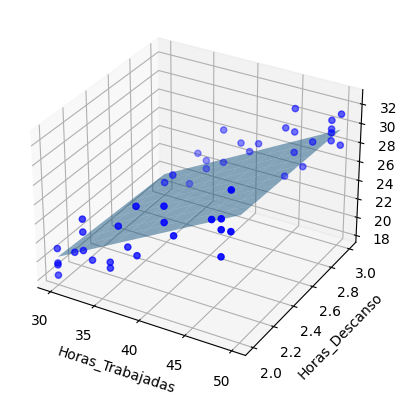

In [4]:
#Crear resultados
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(df[variables_x], df[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción
# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * Horas Trabajadas + {} * Horas de Descanso + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(df[variable_y], modelo.predict(df[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[x1], df[x2], df[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Autos")
plt.show()

In [5]:
# Generar predicción

horas_trabajadas_nuevas = 15
horas_descanso_nuevas = 3

prediccion_nueva = pd.DataFrame({x1: [horas_trabajadas_nuevas], x2: [horas_descanso_nuevas]})
autos_producidos_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de productos producidos para', horas_trabajadas_nuevas, 'horas trabajadas y', horas_descanso_nuevas, 'horas de descanso es', round(autos_producidos_prediccion[0], 3))

La predicción de productos producidos para 15 horas trabajadas y 3 horas de descanso es 12.07
